# 1.문제 정의
문제이름 : 최근접 쌍의 거리   
문제설명 : 점들의 리스트 P를 입력받아 최근접 쌍의 거리를 구한다.   
문제예시 : 점들의 리스트 P를 입력받아 분할하여 최근접 쌍의 거리를 구하고   
중앙에서도 비교해 최근접 쌍의 거리를 구한다.
# 2.알고리즘 설명
1. 점의 3개 이하이면 억지 기법 알고리즘으로 구한다.
2. 3개 초과일 경우엔 중앙점을 찾아 반으로 나눈다.
3. 왼쪽과 오른쪽에서 최근접 쌍의 거리를 구하고 둘 중 더 작은값을 d에 저장한다.
4. 중앙에서 x좌표가 d이내인 점들의 집합 Pm을 만든다.
5. Pm내에서 d보다 작은 최근접쌍의 거리를 찾는다.
6. 최종적으로 최근접 쌍의 거리를 구해 ds(최근접 쌍의 거리)값을 리턴한다.
# 3.손으로 푼 예제
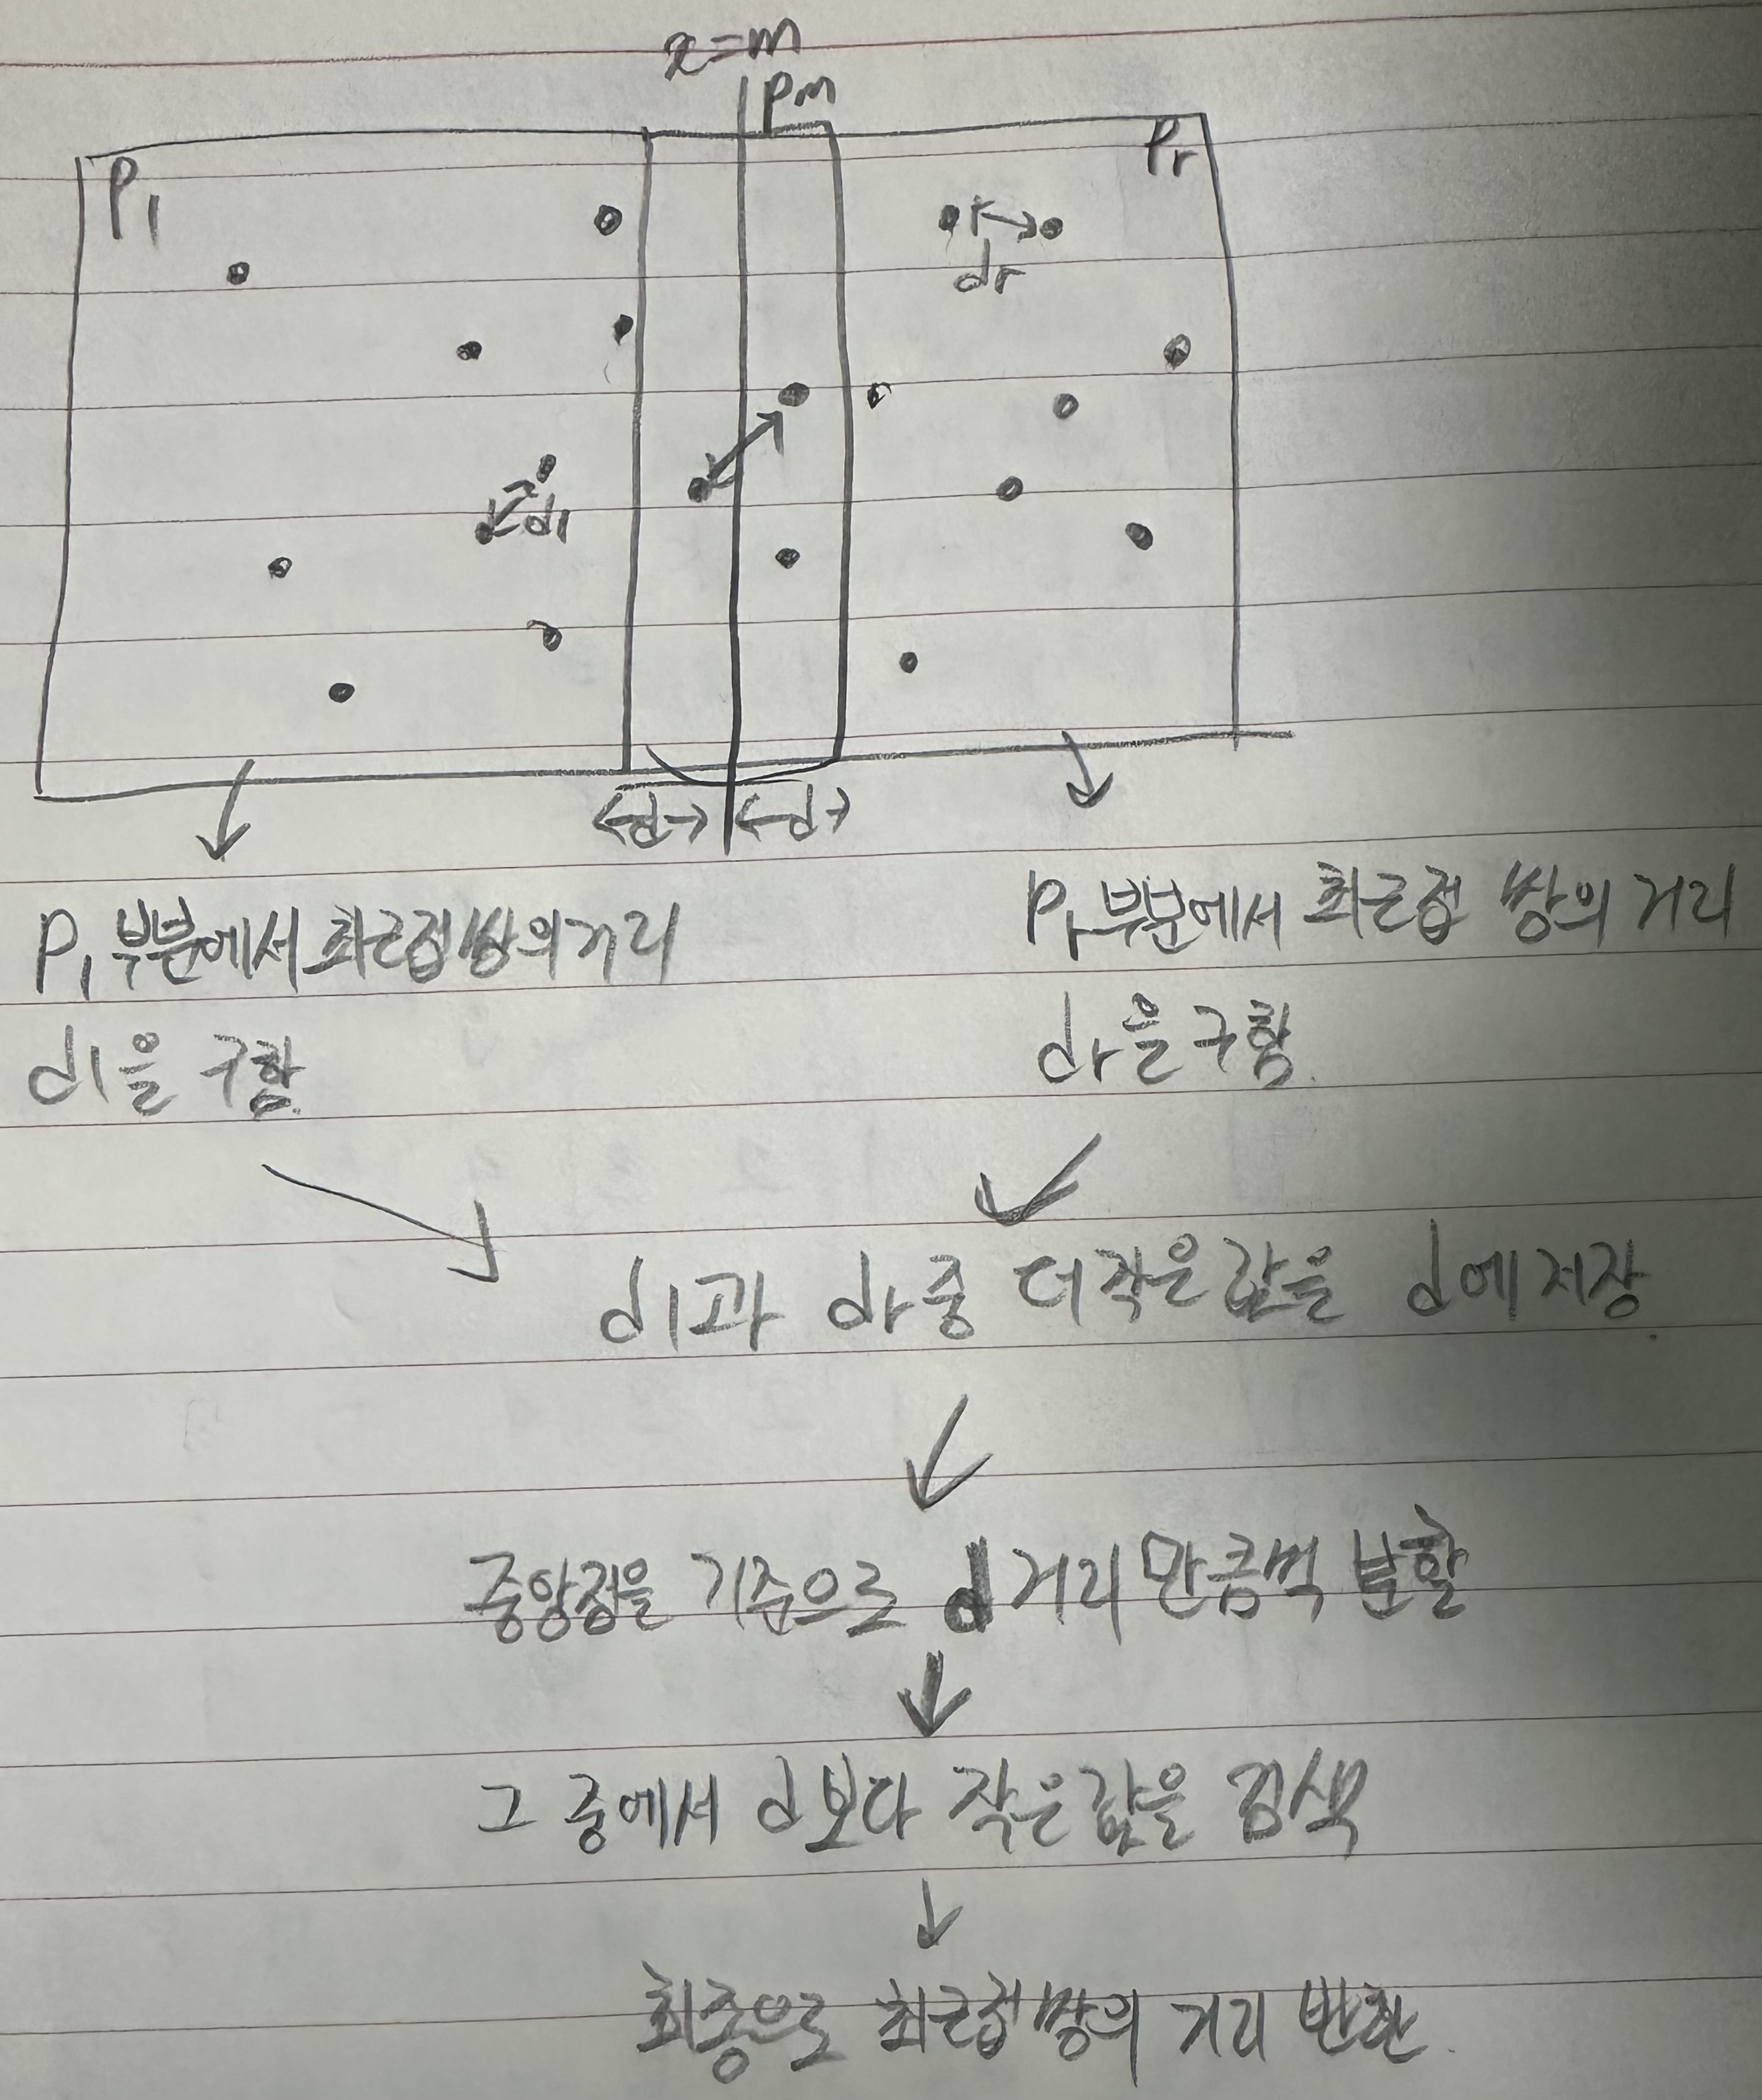
# 4.알고리즘 개요
명칭 : 최근접 쌍의 거리   
입력변수 : 점들의 리스트 P, 점들의 길이 n   
출력 : 최근접 쌍의 거리 ds
# 5.알고리즘 코드

In [ ]:
def closest_pair_dist(P, n) :
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]
    
    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)
    
    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
            
    ds = strip_closest(Pm, d)
    return ds

# 6.테스트 코드

In [1]:
import math

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def strip_closest(P, d):
    n = len(P)
    d_min = d
    P.sort(key = lambda point: point[1])
    
    for i in range(n) :
        j = i + 1
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij = distance(P[i], P[j])
            if dij < d_min :
                d_min = dij
            j += 1
    return d_min
# AL3.4
def closest_pair(p):
    n = len(p)
    mindist = float("inf")
    for i in range(n-1):
        for j in range(i+1, n):
            dist = distance(p[i], p[j])
            if dist < mindist:
                mindist = dist
    return mindist
# AL5.9
def closest_pair_dist(P, n) :
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]
    
    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)
    
    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
            
    ds = strip_closest(Pm, d)
    return ds

p = [(2,3), (12,30), (40,50), (5,1), (12, 10), (3, 4)]
p.sort(key = lambda point: point[0])
print("가장 가까운 두 점의 거리", closest_pair_dist(p, len(p)))

가장 가까운 두 점의 거리 1.4142135623730951


# 7.수행 결과

# 8.복잡도 분석
strip_closest()를 O(n)에 처리한다면, n/2^n씩 늘어나므로 시간 복잡도는   
$$O(nlogn)이다.

# 9.작성자
AL5.9 작성자 : 202110501 박건호